In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Während der EDA ist aufgefallen, dass einige Rossmann Filialen an Sonntagen geöffnet sind.

In [3]:
store_df = pd.read_csv('store.csv')
df = pd.read_csv('train.csv')
merged_df = pd.merge(df, store_df, on='Store', how='left')

C:\Users\Tyrone\AppData\Local\Temp\ipykernel_20940\3439170753.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


## Datenanalyse

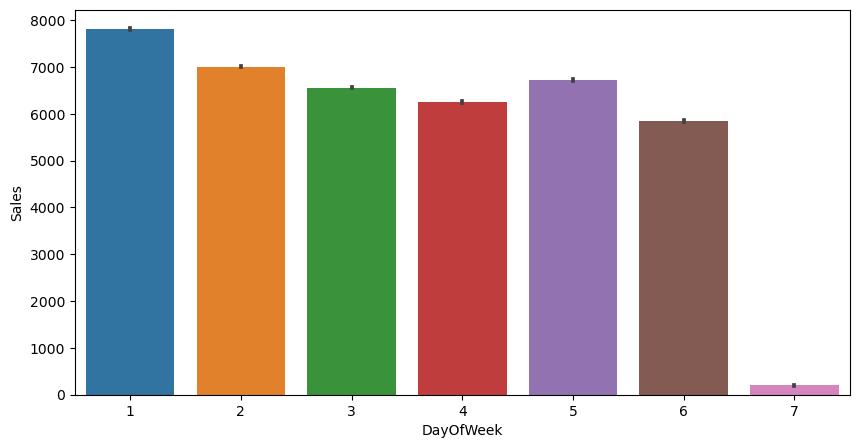

In [4]:
# Schauen, wie sich die Verkäufe über die Wochentage verteilen
plt.figure(figsize=(10,5))
sns.barplot(x='DayOfWeek', y='Sales', data=merged_df)
plt.show()

In [5]:
# Alle Sonntage extrahieren, an denen die Läden geöffnet waren
open_sundays = merged_df.loc[(merged_df['DayOfWeek'] == 7) & (merged_df['Open'] == 1)]
print(f"Anzahl an Einträgen für offene Sonntage: {open_sundays.shape[0]}")

# Wie viele verschiedene Werte gibt es in den Spalten? -> Lassen sich Auffälligkeiten erkennen?
print(f"Unique values:\n{open_sundays.nunique()}\n---------------------------")

# Eventuell waren an den Sonntagen Promo Aktionen? Promo hat schließlich nur einen Wert
open_sundays['Promo'].unique()[0] # -> Keine Promo Aktionen, der einzige Wert ist Promo = 0

# Nur 33 Stores haben an Sonntagen geöffnet
open_stores = open_sundays['Store'].unique()

Anzahl an Einträgen für offene Sonntage: 3593
Unique values:
Store                          33
DayOfWeek                       1
Date                          134
Sales                        3185
Customers                    2079
Open                            1
Promo                           1
StateHoliday                    3
SchoolHoliday                   2
StoreType                       3
Assortment                      3
CompetitionDistance            33
CompetitionOpenSinceMonth       8
CompetitionOpenSinceYear        9
Promo2                          2
Promo2SinceWeek                 6
Promo2SinceYear                 3
PromoInterval                   3
dtype: int64
---------------------------


StoreType
b    2216
a    1100
d     277
Name: count, dtype: int64


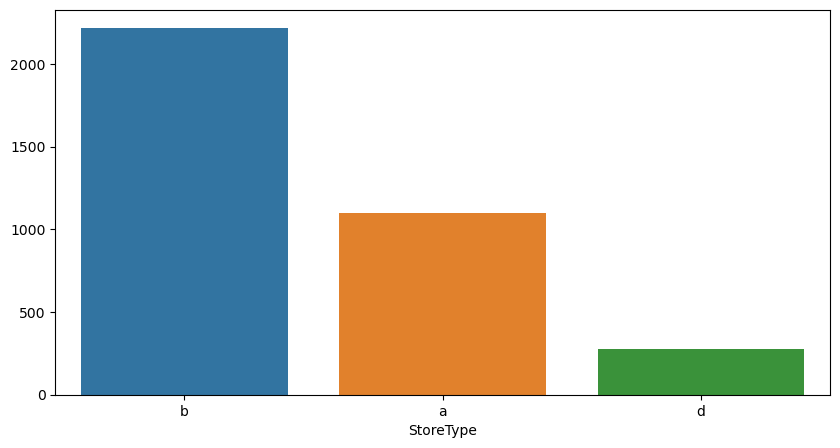

In [6]:
# Lässt sich ein StoreType erkennen, der besonders häufig auftritt?
store_types_count = open_sundays['StoreType'].value_counts()
print(store_types_count)

plt.figure(figsize=(10,5))
sns.barplot(x=store_types_count.index, y=store_types_count.values)
plt.show()

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64


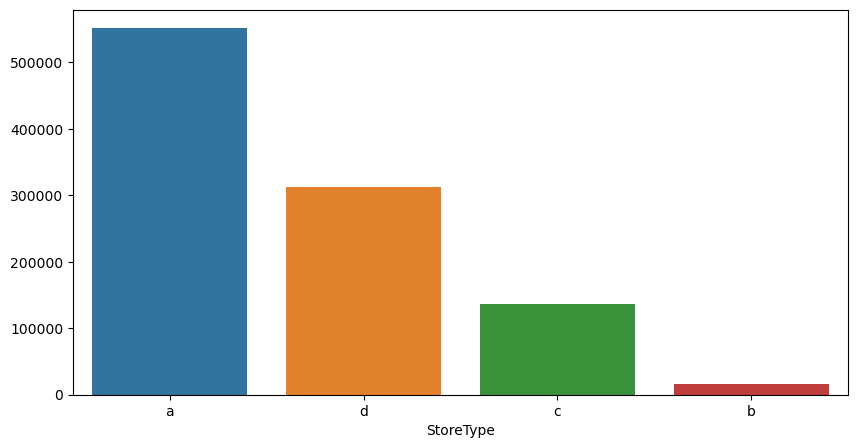

In [7]:
# Entspricht diese Verteilung der Gesamtverteilung, oder gibt es hier Unterschiede? (Abgesehen davon, dass StoreType c gänzlig fehlt)
store_types_count_total = merged_df['StoreType'].value_counts()
print(store_types_count_total)

plt.figure(figsize=(10,5))
sns.barplot(x=store_types_count_total.index, y=store_types_count_total.values)
plt.show()

### Ergebnis: StoreType b tritt bei offenen Sonntagen am häufigsten auf, bei der Gesamtverteilung am wenigsten

In [8]:
### Liegt es vielleicht daran, dass von den 33 Stores die Sonntags offen haben ein Paar sehr viel öfter offen hatten als andere?
open_count_per_store = open_sundays['Store'].value_counts().tolist()

# StoreType der am Sonntag offenen Stores extrahieren
store_types = []
for store in open_stores:
    store_types.append(merged_df.loc[merged_df['Store'] == store]['StoreType'].values[0])

df_open_sundays = pd.DataFrame()
df_open_sundays['Store'] = open_stores
df_open_sundays['StoreType'] = store_types
df_open_sundays['Vorkommen'] = open_count_per_store

df_open_sundays

,Store,StoreType,Vorkommen
0,85,b,134
1,122,a,134
2,209,a,134
3,259,b,134
4,262,b,134
5,274,b,134
6,299,d,134
7,310,a,134
8,335,b,134
9,353,b,134


In [9]:
# Mit höherer Store ID scheint das Vorkommen an Sonntagen eher zu sinken, ist das wirklich so?
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_open_sundays['StoreType'] = label_encoder.fit_transform(df_open_sundays['StoreType'])
df_open_sundays.corr()


,Store,StoreType,Vorkommen
Store,1.000000,-0.082297,-0.85150
StoreType,-0.082297,1.000000,0.16246
Vorkommen,-0.851500,0.162460,1.00000


Es besteht tatsächlich sehr starke negative Korrelation zwischen der Store ID und dem Vorkommen an Sonntagen

In [10]:
print(store_types_count)
store_types_count_total

StoreType
b    2216
a    1100
d     277
Name: count, dtype: int64


StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

In [11]:
# Wieviel Prozent der Einträge für offene Sonntage sind vom StoreType b?
percent_of_type_b = store_types_count[0] / sum(store_types_count) * 100

# Wieviel Prozent der Einträge von StoreTypes b sind an einem Sonntag?
percent_of_type_b_relative = store_types_count[0] / store_types_count_total[3] * 100

# Wieviel Prozent aller Einträge sind am Sonntag?
percent_of_all = store_types_count[0] / sum(store_types_count_total) * 100

print(f"{round(percent_of_type_b,2)}%")
print(f"{round(percent_of_type_b_relative,2)}%")
print(f"{round(percent_of_all,2)}%")

61.68%
14.0%
0.22%


### 14% in percent_of_type_b_relative ist ein interessantes Ergebnis, weil 14% * 7 Wochentage = 98% ergibt. Haben Typ b stores grundsätzlich an allen 7 Wochentagen auf?

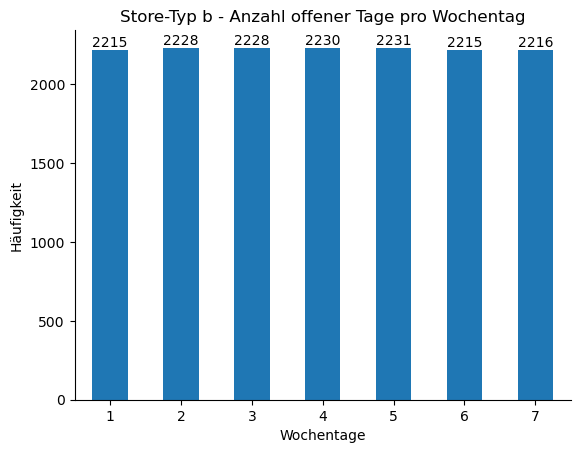

In [12]:
filtered_data = merged_df[(merged_df['Open'] == 1) & (merged_df['StoreType'] == 'b')] # Die anderen StoreTypes wurden auch angeschaut

# Gruppieren nach 'DayOfWeek' und zählen die Häufigkeit
frequency = filtered_data.groupby('DayOfWeek').size()

ax = frequency.plot(kind='bar')
plt.title('Store-Typ b - Anzahl offener Tage pro Wochentag')
plt.xlabel('Wochentage')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=0)
sns.despine()

# Textlabels hinzufügen
for i, v in enumerate(frequency):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

### Haben stores vom Typ b auch vermehrt an Feiertagen offen?

In [13]:
print(merged_df.loc[merged_df['StateHoliday']==0,'StoreType'].value_counts())
print(merged_df.loc[merged_df['StateHoliday']=='0','StoreType'].value_counts())
print(merged_df.loc[merged_df['StateHoliday']=='a','StoreType'].value_counts())
print(merged_df.loc[merged_df['StateHoliday']=='b','StoreType'].value_counts())

StoreType
a    71686
d    39179
c    18083
b     2124
Name: count, dtype: int64
StoreType
a    463256
d    263908
c    114675
b     13248
Name: count, dtype: int64
StoreType
a    10833
d     6507
c     2630
b      290
Name: count, dtype: int64
StoreType
a    3612
d    2088
c     888
b     102
Name: count, dtype: int64


### Offenbar nicht.

# Finding 1

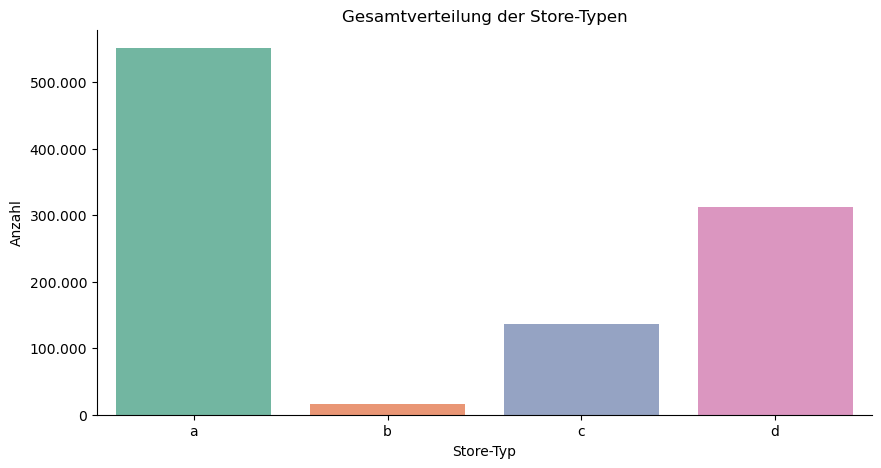

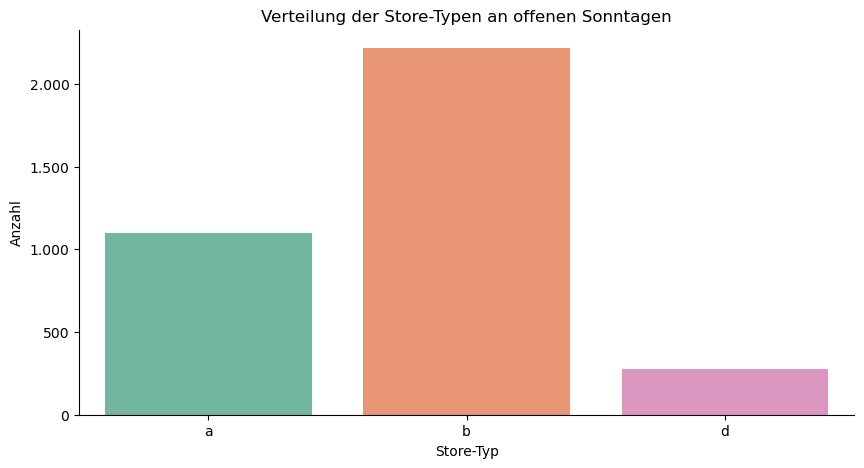

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Formatierung für die folgenden Plots
store_type_order_total = ['a', 'b', 'c', 'd']
store_type_order_sundays = ['a', 'b', 'd']
store_type_colors = sns.color_palette("Set2", n_colors=len(store_type_order_total))

bar_colors = {'a': store_type_colors[0], 'b': store_type_colors[1], 'c': store_type_colors[2], 'd': store_type_colors[3]}

# Plot für die Gesamtverteilung
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=store_types_count_total.index, y=store_types_count_total.values, order=store_type_order_total, palette=bar_colors)
plt.title("Gesamtverteilung der Store-Typen")
plt.xlabel("Store-Typ")
plt.ylabel("Anzahl")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.'))) # Formatierung der y-Achse mit Tausendertrennzeichen
sns.despine()
plt.show()

# Plot für die offenen Sonntage
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=store_types_count.index, y=store_types_count.values, order=store_type_order_sundays, palette=bar_colors)
plt.title("Verteilung der Store-Typen an offenen Sonntagen")
plt.xlabel("Store-Typ")
plt.ylabel("Anzahl")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', '.'))) # Formatierung der y-Achse mit Tausendertrennzeichen
sns.despine()
plt.show()


### Auffällig ist, dass der Store-Typ b insgesamt am wenigsten vertreten ist, allerdings den Großteil (61,68%) der offenen Sonntage ausmacht. Bei näherer Betrachtung zeigte sich, dass der Store-Typ b grundsätzlich Sonntags offen hat, während a und d nur vereinzelt an Sonntagen offen hatten und c garnicht.

##### Dieser Code plottet die Anzahl offener Tage pro Wochentag

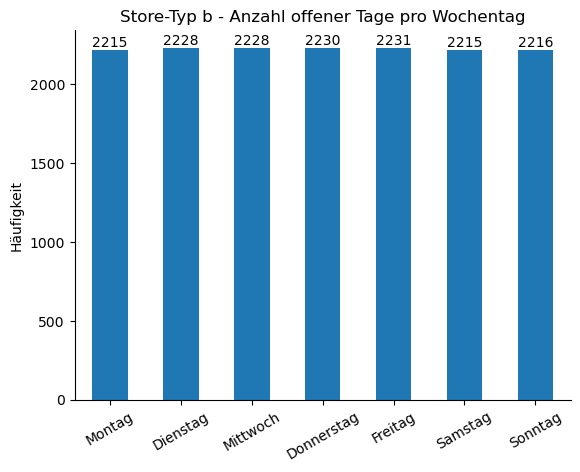

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

frequency.index = pd.Series(['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'])

ax = frequency.plot(kind='bar')
plt.title('Store-Typ b - Anzahl offener Tage pro Wochentag')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=30)
sns.despine()

# Textlabels hinzufügen
for i, v in enumerate(frequency):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


## Store-Typ b scheint also eine seltene Art von Rossmann Filliale zu sein, welche über Sondergenehmigungen für das öffnen an Sonntagen verfügt.